# Mental Maps
Even if you've never seen the map of a city you've been walking around in for a couple of hourse, you can kind of reconstruct the map of the city. That's what this project is about: can we make a model that learns an implicit representation of the map by just walking around?

Our maps will be simple binary maps, that we can generate in Google Drive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
import pickle
%matplotlib inline

In [2]:
# How big will our views be?
view_size = 5
border = (view_size - 1) / 2

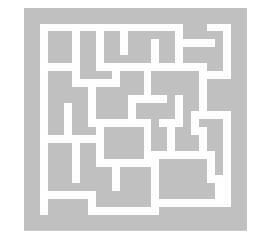

In [3]:
# Read out the map
M = load_map('map2.csv', border=border)

# Show the map
show_map(M, True)

# Generate training data
We can generate an artificial dataset. It will consist of random walks through our map. At every timestep, we can store the local surroundings and later use those as inputs to our RNN. But first, we need the random walks... 

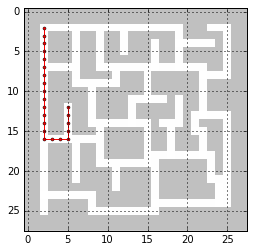

In [4]:
# Get path and split x and y coordinates
init = (border, border)
path = generate_path(init, 1000, M)
show_path(path, color='r')
show_map(M)

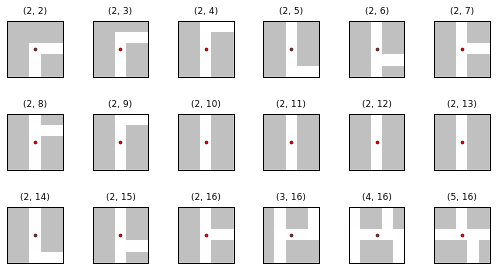

In [5]:
show_views(path[:18], M, size=view_size, plotsize=1.5)

The next step is to generate our training data. It is often convenient to create the training data beforehand and save them to a file. Our training data will consist of sequences of paths, starting from random positions.

In [6]:
# How many training instances do you need?
num_training_instances = 20000

# What is the maximum length of the path?
path_length = 80

training_paths = []
for n in range(num_training_instances):
    
    # Pick a random allowed (i.e., on a road) initial position
    allowed_positions = zip(*M.nonzero())
    index = np.random.randint(len(allowed_positions))
    init = allowed_positions[index]
    
    # Generate and store a path from there
    path = generate_path((init[1], init[0]), path_length, M)
    if len(path) < path_length:
        path.append((0,0))
    training_paths.append(path)

# Store
name = "test1"
pickle.dump(training_paths, open('data/{name}-train-data.pickle'.format(name=name), 'wb'))
pickle.dump(M, open('data/{name}-map.pickle'.format(name=name), 'wb'))

# The model
Yes, have fun with that :-)